In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

files = os.listdir("data-files/bus_22")
all_df = []
for file in files:
    df = pd.read_csv("data-files/bus_22/{0}".format(file))
    all_df.append(df)

merged_all_df = pd.concat(all_df)

In [3]:
merged_all_df['버스정류장ARS번호'] = merged_all_df['버스정류장ARS번호'].astype(str)

df = merged_all_df

df.loc[df['버스정류장ARS번호'].str.startswith('1') & (df['버스정류장ARS번호'].str.len() == 4), '구'] = '종로구'
df.loc[df['버스정류장ARS번호'].str.startswith('2') & (df['버스정류장ARS번호'].str.len() == 4), '구'] = '중구'
df.loc[df['버스정류장ARS번호'].str.startswith('3') & (df['버스정류장ARS번호'].str.len() == 4), '구'] = '용산구'
df.loc[df['버스정류장ARS번호'].str.startswith('4') & (df['버스정류장ARS번호'].str.len() == 4), '구'] = '성동구'
df.loc[df['버스정류장ARS번호'].str.startswith('5') & (df['버스정류장ARS번호'].str.len() == 4), '구'] = '광진구'
df.loc[df['버스정류장ARS번호'].str.startswith('6') & (df['버스정류장ARS번호'].str.len() == 4), '구'] = '동대문구'
df.loc[df['버스정류장ARS번호'].str.startswith('7') & (df['버스정류장ARS번호'].str.len() == 4), '구'] = '중랑구'
df.loc[df['버스정류장ARS번호'].str.startswith('8') & (df['버스정류장ARS번호'].str.len() == 4), '구'] = '성북구'
df.loc[df['버스정류장ARS번호'].str.startswith('9') & (df['버스정류장ARS번호'].str.len() == 4), '구'] = '강북구'
df.loc[df['버스정류장ARS번호'].str.startswith('10') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '도봉구'
df.loc[df['버스정류장ARS번호'].str.startswith('11') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '노원구'
df.loc[df['버스정류장ARS번호'].str.startswith('12') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '은평구'
df.loc[df['버스정류장ARS번호'].str.startswith('13') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '서대문구'
df.loc[df['버스정류장ARS번호'].str.startswith('14') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '마포구'
df.loc[df['버스정류장ARS번호'].str.startswith('15') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '양천구'
df.loc[df['버스정류장ARS번호'].str.startswith('16') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '강서구'
df.loc[df['버스정류장ARS번호'].str.startswith('17') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '구로구'
df.loc[df['버스정류장ARS번호'].str.startswith('18') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '금천구'
df.loc[df['버스정류장ARS번호'].str.startswith('19') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '영등포구'
df.loc[df['버스정류장ARS번호'].str.startswith('20') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '동작구'
df.loc[df['버스정류장ARS번호'].str.startswith('21') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '관악구'
df.loc[df['버스정류장ARS번호'].str.startswith('22') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '서초구'
df.loc[df['버스정류장ARS번호'].str.startswith('23') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '강남구'
df.loc[df['버스정류장ARS번호'].str.startswith('24') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '송파구'
df.loc[df['버스정류장ARS번호'].str.startswith('25') & (df['버스정류장ARS번호'].str.len() == 5), '구'] = '강동구'

In [4]:
on_columns = [col for col in df.columns if '승차' in col]
off_columns = [col for col in df.columns if '하차' in col]

In [5]:
df['총승차객수'] = df[on_columns].sum(axis=1)
df['총하차객수'] = df[off_columns].sum(axis=1)

In [6]:
result = df.groupby('구')[['총승차객수', '총하차객수']].sum().reset_index()
result_1 = result[result['구']!='기타'].reset_index(drop=True)
print(result_1)

       구     총승차객수     총하차객수
0    강남구  94376431  87651313
1    강동구  27155182  26815503
2    강북구  58432859  56050998
3    강서구  63720804  60789640
4    관악구  92702373  89454331
5    광진구  31840472  32299472
6    구로구  57108139  56374530
7    금천구  46669437  45946782
8    노원구  51409495  50285130
9    도봉구  38187812  38064051
10  동대문구  62655773  61712280
11   동작구  61803882  64045791
12   마포구  63786743  62693650
13  서대문구  73712784  72175274
14   서초구  86552102  85688826
15   성동구  35118053  34819888
16   성북구  75959717  75587346
17   송파구  64508573  64678056
18   양천구  47283149  46078449
19  영등포구  69186635  66858499
20   용산구  50338521  48058788
21   은평구  62673190  61447979
22   종로구  66224995  63347318
23    중구  45503810  43701611
24   중랑구  49759622  48699119


In [7]:
seoul_df = pd.read_csv('data-files/seoul_apt.csv')

In [8]:
# 거래금액의 dtype을 object -> int
seoul_df["거래금액(만원)"] = seoul_df["거래금액(만원)"].map(lambda v : int(str(v).replace(",","")))
seoul_df["거래금액(만원)"].dtype

dtype('int64')

In [9]:
# 1㎡ 당 거래금액  (기준거래금액)
seoul_df['price_ratio'] = seoul_df['거래금액(만원)'] / seoul_df['전용면적(㎡)']
print(type('price_ratio'))

<class 'str'>


In [10]:
seoul_df['구'] = seoul_df['시군구'].map(lambda v: v.split()[1])

In [11]:
gu_names = seoul_df['구'].drop_duplicates().values

In [12]:
gu_mean = seoul_df.groupby('구')["price_ratio"].mean()
gu_mean

구
강남구     2319.661130
강동구     1324.007920
강북구      942.362287
강서구     1035.471068
관악구     1045.121862
광진구     1424.976143
구로구      881.571623
금천구     1014.928440
노원구     1116.919153
도봉구      890.353734
동대문구    1109.253428
동작구     1421.556736
마포구     1569.330819
서대문구    1217.726295
서초구     2331.882458
성동구     1841.307405
성북구     1128.800410
송파구     1964.137905
양천구     1311.634950
영등포구    1220.885666
용산구     1986.455524
은평구     1015.980834
종로구     1174.337584
중구      1213.159451
중랑구      994.503679
Name: price_ratio, dtype: float64

In [51]:
# merged_df = pd.merge(gu_mean, result_1, on='구', how='inner')
# merged_df

In [52]:
# correlation_matrix = merged_df[['총승차객수', 'price_ratio']].corr()
# correlation_matrix

In [53]:
# import seaborn as sns

# plt.rc('font', family='Malgun Gothic')
# plt.rcParams['axes.unicode_minus'] = False

# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
# plt.title("버스 승차객수, 단위 기준 매매가의 상관관계 히트맵")
# plt.show()

In [18]:
metro_df = pd.read_csv('data-files/sub_2022.csv')

In [19]:
# 구와 역 리스트 매핑
station_to_gu = {
    "강남구": ["삼성", "선릉", "역삼", "강남", "압구정", "신사", "매봉", "도곡", "대치", "학여울", "대청", "일원", "수서", "청담", "강남구청", "학동", "논현", "언주", "선정릉", "삼성중앙", "봉은사"],
    "강동구": ["천호", "강동", "길동", "굽은다리", "명일", "고덕", "상일동", "둔촌동", "강일", "암사", "천호", "강동구청", "둔촌오륜", "중앙보훈병원"],
    "강북구": ["수유", "미아", "미아사거리"],
    "강서구": ["방화", "개화산", "김포공항", "송정", "마곡", "발산", "우장산", "화곡", "까치산"],
    "관악구": ["낙성대", "서울대입구", "봉천", "신림"],
    "광진구": ["건대입구", "구의", "강변", "군자", "아차산", "광나루", "중곡", "군자", "어린이대공원", "건대입구", "뚝섬유원지"],
    "구로구": ["구로디지털단지", "대림", "신도림", "도림천", "남구로", "천왕", "온수"],
    "금천구": ["가산디지털단지"],
    "노원구": ["당고개", "상계", "노원", "석계", "태릉입구", "화랑대", "수락산", "마들", "노원", "중계", "하계", "공릉", "태릉입구"],
    "도봉구": ["창동", "쌍문", "도봉산"],
    "동대문구": ["신설동", "제기동", "청량리", "용두", "신설동", "장한평"],
    "동작구": ["사당", "신대방", "동작", "이수", "남성", "숭실대입구", "상도", "장승배기", "신대방삼거리", "보라매"],
    "마포구": ["합정", "홍대입구", "신촌", "이대", "아현", "마포", "공덕", "애오개", "월드컵경기장", "마포구청", "망원", "상수", "광흥창", "대흥"], 
    "서대문구": ["충정로", "홍제", "무악재", "독립문", "충정로"],
    "서초구": ["교대", "서초", "방배", "잠원", "고속터미널", "남부터미널", "양재", "남태령", "반포", "내방"],
    "성동구": ["상왕십리", "왕십리", "한양대", "뚝섬", "성수", "용답", "신답", "금호", "옥수", "신금호", "행당", "마장", "답십리"],
    "성북구": ["길음", "성신여대입구", "한성대입구", "보문", "안암", "고려대", "월곡", "상월곡", "돌곶이"],
    "송파구": ["잠실나루", "잠실", "잠실새내", "종합운동장", "가락시장", "경찰병원", "오금", "올림픽공원", "방이", "개롱", "거여", "마천", "몽촌토성",
             "석촌", "송파", "문정", "장지", "복정", "삼전", "석촌고분", "송파나루", "한성백제"],
    "양천구": ["양천구청", "신정네거리", "신정", "목동", "오목교"],
    "영등포구": ["문래", "영등포구청", "당산", "양평", "영등포시장", "신길", "여의도", "여의나루", "신풍"],
    "용산구": ["숙대입구", "삼각지", "신용산", "이촌", "효창공원앞", "녹사평", "이태원", "한강진"],
    "은평구": ["구파발", "연신내", "불광", "녹번", "응암", "역촌", "독바위", "구산", "새절", "증산", "디지털미디어시티"],
    "종로구": ["종각", "종로3가", "종로5가", "동대문", "동묘앞", "경복궁", "안국", "혜화", "서대문", "광화문", "창신"],
    "중구": ["서울", "시청", "을지로입구", "을지로3가", "을지로4가", "동대문역사문화공원", "신당", "충무로", "동대입구", "약수", "명동", "회현", "청구", "버티고개", "청구"],
    "중랑구": ["봉화산", "신내", "먹골", "중화", "상봉", "면목", "사가정", "용마산"]
}

In [20]:
def find_gu(staion_name):
    for gu, staions in station_to_gu.items():
        if staion_name in staions:
            return gu
    return '기타'

In [21]:
metro_df['구'] = metro_df['역명'].apply(find_gu)

In [23]:
metro_result = metro_df.groupby('구')[['승차총승객수', '하차총승객수']].sum().reset_index()
metro_result_1 = metro_result[metro_result['구']!='기타'].reset_index(drop=True)
metro_result_1

,구,승차총승객수,하차총승객수
0,강남구,155533337,161209296
1,강동구,36564622,35098105
2,강북구,9001341,8758311
3,강서구,49045060,47238131
4,관악구,28063756,26917237
5,광진구,23353031,24126115
6,구로구,44684691,44709053
7,금천구,18287415,19121049
8,노원구,52859796,52561239
9,도봉구,23775519,23121580


In [54]:
# merged_df_1 = pd.merge(metro_result_1, gu_mean, on='구', how='inner')
# merged_df_1

In [55]:
# correlation_matrix_1 = merged_df_1[['승차총승객수', 'price_ratio']].corr()
# correlation_matrix_1

In [56]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix_1, annot=True, cmap='Greens')
# plt.title("지하철 승차객수, 단위 기준 매매가의 상관관계 히트맵")
# plt.show()

In [31]:
mart_df = pd.read_csv('data-files/mart.csv')

In [33]:
mart_df = mart_df[mart_df['상세영업상태명']!='폐업처리'].reset_index(drop=True)
mart_df = mart_df[mart_df['상세영업상태명']!='휴업처리'].reset_index(drop=True) 
mart_df = mart_df[mart_df['상세영업상태명']!='직권취소'].reset_index(drop=True) 

mart_df_1 = mart_df[mart_df['인허가일자'].map(lambda v: v[:4] not in ('2023', '2024'))] # or mart_df_1[mart_df_1['인허가일자'][:4]!='2024']

In [35]:
mart_df_1['구'] = mart_df_1['도로명주소'].str.extract(r'서울특별시\s([가-힣]+구)')

C:\Users\human\AppData\Local\Temp\ipykernel_20164\698600856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mart_df_1['구'] = mart_df_1['도로명주소'].str.extract(r'서울특별시\s([가-힣]+구)')


In [36]:
구별_마트_개수 = mart_df_1['구'].value_counts().reset_index()
구별_마트_개수.columns = ['구', '마트_개수']
구별_마트_개수 = 구별_마트_개수.sort_values(by='마트_개수', ascending=False).reset_index(drop=True)
구별_마트_개수 = 구별_마트_개수[구별_마트_개수['구']!='압구'].reset_index(drop=True)

In [57]:
# merged_df_2 = pd.merge(구별_마트_개수, gu_mean, on='구', how='inner')
# merged_df_2

In [58]:
# correlation_matrix_2 = merged_df_2[['마트_개수', 'price_ratio']].corr()
# correlation_matrix_2

In [59]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix_2, annot=True, cmap='Greens')
# plt.title("대형마트, 단위 기준 매매가의 상관관계 히트맵")
# plt.show()

In [48]:
merged_df_3 = pd.merge(merged_df, metro_result_1, on='구', how='inner')
merged_df_4 = pd.merge(merged_df_3, 구별_마트_개수, on='구', how='inner')
print(merged_df_4.columns)
merged_df_4

Index(['구', 'price_ratio', '총승차객수', '총하차객수', '승차총승객수', '하차총승객수', '마트_개수'], dtype='object')


,구,price_ratio,총승차객수,총하차객수,승차총승객수,하차총승객수,마트_개수
0,강남구,2319.661130,94376431,87651313,155533337,161209296,47
1,강동구,1324.007920,27155182,26815503,36564622,35098105,20
2,강북구,942.362287,58432859,56050998,9001341,8758311,21
3,강서구,1035.471068,63720804,60789640,49045060,47238131,22
4,관악구,1045.121862,92702373,89454331,28063756,26917237,19
5,광진구,1424.976143,31840472,32299472,23353031,24126115,26
6,구로구,881.571623,57108139,56374530,44684691,44709053,25
7,금천구,1014.928440,46669437,45946782,18287415,19121049,22
8,노원구,1116.919153,51409495,50285130,52859796,52561239,19
9,도봉구,890.353734,38187812,38064051,23775519,23121580,15


In [49]:
merged_df_4.columns = ['구', '기준매매가', '버스승차객수', '버스하차객수', '지하철승차객수', '지하철하차객수', '마트개수']

correlation_matrix_3 = merged_df_4[['버스승차객수', '지하철승차객수', '마트개수', '기준매매가']].corr()
correlation_matrix_3

,버스승차객수,지하철승차객수,마트개수,기준매매가
버스승차객수,1.000000,0.362005,0.239683,0.265137
지하철승차객수,0.362005,1.000000,0.557795,0.492272
마트개수,0.239683,0.557795,1.000000,0.346913
기준매매가,0.265137,0.492272,0.346913,1.000000


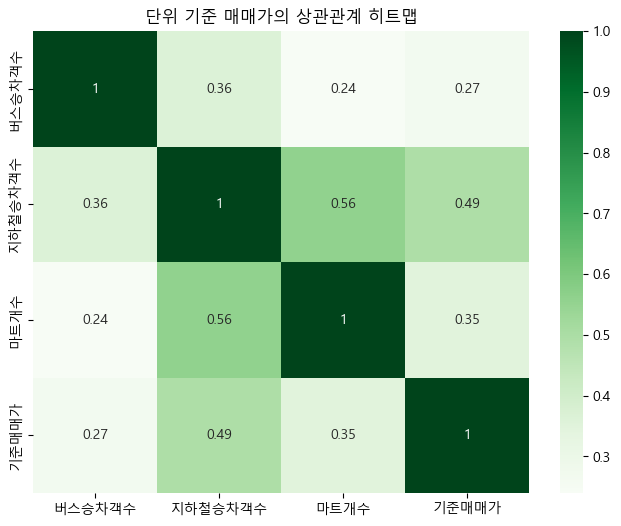

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_3, annot=True, cmap='Greens')
plt.title("단위 기준 매매가의 상관관계 히트맵")
plt.show()